In [1]:
import torch
import numpy as np
from torch.autograd import Variable
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
    y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:,0], x[:,1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [3]:
np.random.seed(1)
m = 400
N = int(m / 2)
D = 2
x = np.zeros((m,D))
y = np.zeros((m,1), dtype='uint8')
a = 4
for j in range(2):
    ix = range(N*j, N*(j + 1))
    t = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2
    r = a * np.sin(4 * t) + np.random.randn(N) * 0.2
    x[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

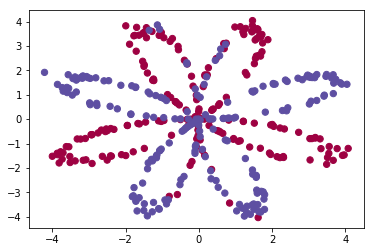

In [4]:
plt.scatter(x[:,0], x[:,1],c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

# logistic method

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [6]:
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.randn(1))

optimizer = torch.optim.SGD([w,b], 1e-1)

def logistic_regression(x):
    return torch.mm(x, w) + b

criterion = nn.BCEWithLogitsLoss()

In [7]:
for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(e + 1) % 20 == 0:
        print('epoch:{}, loss:{}'.format(e+1, loss.data[0]))

epoch:20, loss:0.6786357164382935
epoch:40, loss:0.6747658252716064
epoch:60, loss:0.6737529635429382
epoch:80, loss:0.6733764410018921
epoch:100, loss:0.6732336282730103


G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


In [8]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5, 1.0, 'logistic regression')

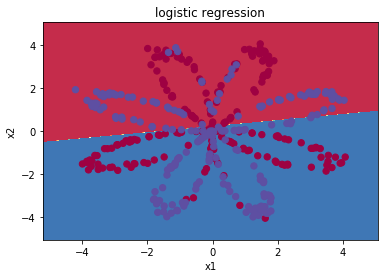

In [13]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

In [10]:
w1 = nn.Parameter(torch.randn(2,4) * 0.01)
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.rand(4,1) *  0.01)
b2 = nn.Parameter(torch.zeros(1))

def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    return x2;

optimizer = torch.optim.SGD([w1,w2,b1,b2], 1.)

criterion = nn.BCEWithLogitsLoss()


for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out,Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(e + 1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.data[0]))

G:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch:1000, loss:0.28969651460647583
epoch:2000, loss:0.27323660254478455
epoch:3000, loss:0.26570191979408264
epoch:4000, loss:0.2606797516345978
epoch:5000, loss:0.25712332129478455
epoch:6000, loss:0.2545035779476166
epoch:7000, loss:0.2525085210800171
epoch:8000, loss:0.25094664096832275
epoch:9000, loss:0.24969518184661865
epoch:10000, loss:0.2486726939678192


In [11]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1,w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

G:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
G:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, '2 layer network')

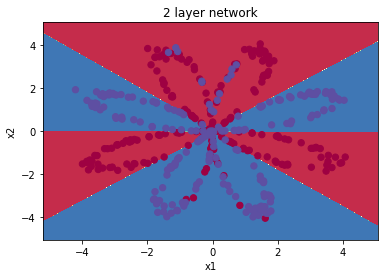

In [12]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

In [14]:
seq_net = nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)
)

In [15]:
seq_net[0]

Linear(in_features=2, out_features=4, bias=True)

In [17]:
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[-0.3232, -0.1071],
        [ 0.4146,  0.6129],
        [-0.6800,  0.3340],
        [ 0.1383, -0.0088]], requires_grad=True)


In [20]:
param = seq_net.parameters()

optim = torch.optim.SGD(param, 1.)

for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if(e + 1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.data[0]))

G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


epoch:1000, loss:0.28688058257102966
epoch:2000, loss:0.2742752134799957
epoch:3000, loss:0.2669501006603241
epoch:4000, loss:0.26105621457099915
epoch:5000, loss:0.25754448771476746
epoch:6000, loss:0.2550640404224396
epoch:7000, loss:0.25289908051490784
epoch:8000, loss:0.25120091438293457
epoch:9000, loss:0.24985595047473907
epoch:10000, loss:0.24877247214317322


In [21]:
def plot_Seq(x):
    out = F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

G:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'sequential')

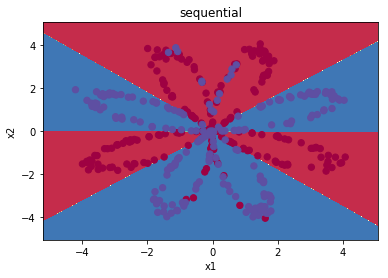

In [22]:
plot_decision_boundary(lambda x: plot_Seq(x), x.numpy(), y.numpy())
plt.title('sequential')

In [23]:
#参数和模型保存在一起
torch.save(seq_net, 'save_seq_net.pth')

In [24]:
#读取保存的模型
seq_net1 = torch.load('save_seq_net.pth')
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [25]:
print(seq_net1[0].weight)

Parameter containing:
tensor([[ -0.3822,  -1.5139],
        [ 10.0897,  11.7945],
        [-10.3412,  12.9484],
        [ -0.0455,  -7.9241]], requires_grad=True)


In [26]:
#只保存参数，不保存模型
torch.save(seq_net.state_dict(), 'save_seq_net_parameters.pth')

seq_net2 = nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)
)

seq_net2.load_state_dict(torch.load('save_seq_net_parameters.pth'))

seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [27]:
print(seq_net2[0].weight)

Parameter containing:
tensor([[ -0.3822,  -1.5139],
        [ 10.0897,  11.7945],
        [-10.3412,  12.9484],
        [ -0.0455,  -7.9241]], requires_grad=True)


In [ ]:
class myNet(nn.Module):
    def __init__(self, inc,outc):
        super(myNet, self).__init__()
        self.layer1 = nn.Linear()
        self.layer2 = nn.Sequential(
            
        )
        
    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x)
        
        return x

In [29]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input,num_hidden)
        self.layer2 = nn.Tanh()
        self.layer3 = nn.Linear(num_hidden,num_output)
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x
    
mo_net = module_net(2 ,4, 1)

l1 = mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [30]:
print(l1.weight)

Parameter containing:
tensor([[-0.1738,  0.3592],
        [ 0.0108,  0.6281],
        [ 0.6496,  0.3642],
        [-0.4367, -0.4742]], requires_grad=True)


In [31]:
optimizer = torch.optim.SGD(mo_net.parameters(), 1.)

for e in range(10000):
    out = mo_net(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(e + 1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.data[0]))

G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.


epoch:1000, loss:0.28957676887512207
epoch:2000, loss:0.2765199542045593
epoch:3000, loss:0.26936036348342896
epoch:4000, loss:0.264478474855423
epoch:5000, loss:0.256991446018219
epoch:6000, loss:0.2543720602989197
epoch:7000, loss:0.25240251421928406
epoch:8000, loss:0.25085896253585815
epoch:9000, loss:0.24962154030799866
epoch:10000, loss:0.24861015379428864


In [32]:
torch.save(mo_net.state_dict(), 'module_net.pth')

In [33]:
net1 = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 4),
    nn.Tanh(),
    nn.Linear(4, 2),
    nn.Tanh(),
    nn.Linear(2, 1)
)

optim = torch.optim.SGD(net1.parameters(), 0.5)

for e in range(20000):
    out = net1(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if(e +1) % 1000 == 0:
        print('epoch:{}, loss:{}'.format(e + 1, loss.data[0]))

G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch:1000, loss:0.1857190579175949
epoch:2000, loss:0.17452259361743927
epoch:3000, loss:0.17282290756702423
epoch:4000, loss:0.16320854425430298
epoch:5000, loss:0.17119953036308289
epoch:6000, loss:0.17370958626270294
epoch:7000, loss:0.16742515563964844
epoch:8000, loss:0.1403660923242569
epoch:9000, loss:0.17792831361293793
epoch:10000, loss:0.12868525087833405
epoch:11000, loss:0.13076089322566986
epoch:12000, loss:0.12374204397201538
epoch:13000, loss:0.12413107603788376
epoch:14000, loss:0.13452789187431335
epoch:15000, loss:0.11763594299554825
epoch:16000, loss:0.13055050373077393
epoch:17000, loss:0.1256951540708542
epoch:18000, loss:0.12724719941616058
epoch:19000, loss:0.10567525029182434
epoch:20000, loss:0.0966714397072792


G:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'mynet1')

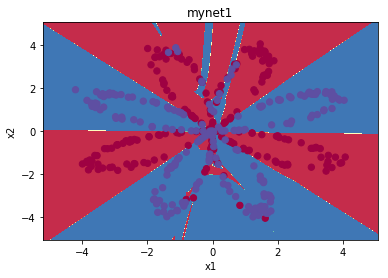

In [34]:
def plot_net1(x):
    out = F.sigmoid(net1(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

plot_decision_boundary(lambda x: plot_net1(x), x.numpy(), y.numpy())
plt.title('mynet1')